In [1]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import copy

In [2]:
results = []
sizes   = []

with open('dataset_size_results.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        vals = copy.deepcopy(row)
        del vals['Dataset Size']
        size = int(row['Dataset Size'])
        sizes.append(size)
        results.append( vals )

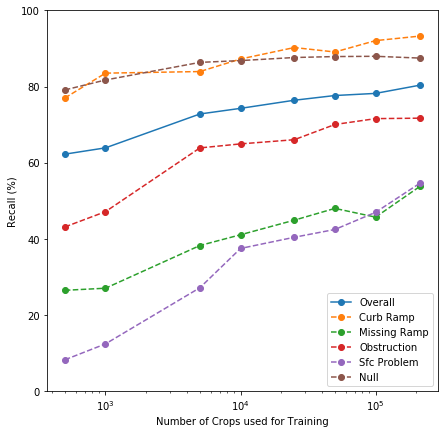

In [3]:
plt.figure(figsize=(7,7))
for label in ('Overall', 'Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem', 'Null'):
    acc = []
    for i, size in enumerate(sizes):
        acc.append(float(results[i][label]))
    
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(sizes, acc, label=label, linestyle=line, marker='o')
plt.xlabel("Number of Crops used for Training")
plt.ylabel('Recall (%)')
plt.ylim(0,100)
plt.xscale('log')
#plt.title("Accuracy on Newberg Data as a function of Training Data")
plt.legend()

plt.show()